In [1]:
!nvidia-smi

Fri Mar 19 10:15:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip3 install wandb

     |████████████████████████████████| 2.0MB 9.3MB/s 
     |████████████████████████████████| 163kB 50.8MB/s 
     |████████████████████████████████| 133kB 46.1MB/s 
     |████████████████████████████████| 102kB 12.4MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=2f89a9c0b1f92029a8b15b43ec0000cf878f95ca7903ba3f7b0468a87c597684
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=51861565a93594c38c353724445882696ab4ebe00eefc719a0cb8b0e71ae8fb1
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32


# Intro to NN classification with TensorFlow

In this notebook we're going to learn how to write a neural networks for classification problems.

A classification is where you try to classify as one thing or another thing

Few types of classification
* Binary classification
* Multiclass classification
* Multilabel classifcation


## Creating data to view and fit

In [3]:
from sklearn.datasets import make_circles

# Make 1000 Example
n_samples = 1000
# Create circles 
X,y = make_circles(n_samples=n_samples,noise=0.03,random_state=42)

In [4]:
X[:1]

array([[0.75424625, 0.23148074]])

In [5]:
y[:1]

array([1])

### Our data is a bit hard to understand lets visualize it.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

circles = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})

In [7]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


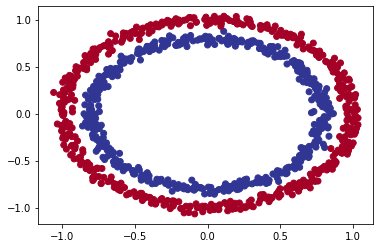

In [8]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

## Input and output shape

In [9]:
# Check the shapes of our features and labels

In [10]:
X.shape

(1000, 2)

In [11]:
y.shape

(1000,)

In [12]:
# Length
len(X)

1000

In [13]:
len(y)

1000

In [14]:
# View the first sample of X and y

In [15]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with tensorflow typically: 

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evluate the model
5. Tweak
6. Evaluate...

In [16]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [17]:
# Random Seed
tf.random.set_seed(42)

# Create the model using the sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.SGD())

# Fit
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 2ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5157


In [18]:
# Train for longer
model_1.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4890
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4960
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4470
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4880
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4800
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5050
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4970
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4800
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4830
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4790
Epoch 11/

In [19]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we are working ona  binary classification problem and out model if getting 50% accuracy it performing.

Lets add another layer

In [20]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])

model_2.fit(X,y,epochs=100,verbose=0)

In [21]:
# Evluate
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

## Improving our model

Lets look into our bag of tricks to see how we can improve our model.

1. Create a model - add more layers, increase the number of neurons, change the activation type.
2. Compileing a model - different optimizer, changing learning rate
3. Fiting a model - more epochs


In [22]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())

model_3.fit(X,y,epochs=100,verbose=0)

In [23]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5090


[0.6980189681053162, 0.5090000033378601]

To visualize our models predictions lets create  funtion `plot_decision_bounary()` 
Ths funtion will: 

* Take in a trained mode, X and y.
* Create a meshgrid of the different X values.
* Make preds across the meshgrid
* Plot the preds as well as a line between zones

In [24]:
import numpy as np

In [25]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


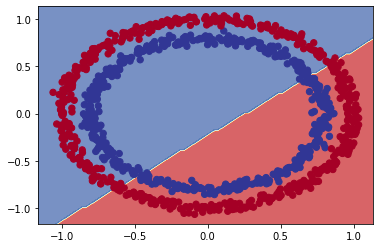

In [26]:
plot_decision_boundary(model_3,X,y)

In [27]:
X[:,0].min() - 0.1

-1.1595024599098636

In [28]:
X[:,0].min()

-1.0595024599098635

In [29]:
X[:,0].max() + 0.1

1.1337117525463374

In [30]:
# Lets see if our model can be used for a regression problem
tf.random.set_seed(42)

X_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5)

X_reg_train = X_reg[:150]
y_reg_train = y_reg[:150]
X_reg_test = X_reg[150:]
y_reg_test = y_reg[150:]

# model_3.fit(X_reg_train,y_reg_train,epochs=100)

In [31]:
X_reg_test

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810,
       815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875,
       880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940,
       945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995], dtype=int32)>

In [32]:
X_reg_train

<tf.Tensor: shape=(150,), dtype=int32, numpy=
array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
       325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
       390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
       455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
       520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
       585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
       650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
       715, 720, 725, 730, 735, 740, 745], dtype=int32)>

In [33]:
y_reg_test

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 850,  855,  860,  865,  870,  875,  880,  885,  890,  895,  900,
        905,  910,  915,  920,  925,  930,  935,  940,  945,  950,  955,
        960,  965,  970,  975,  980,  985,  990,  995, 1000, 1005, 1010,
       1015, 1020, 1025, 1030, 1035, 1040, 1045, 1050, 1055, 1060, 1065,
       1070, 1075, 1080, 1085, 1090, 1095], dtype=int32)>

In [34]:
y_reg_train

<tf.Tensor: shape=(150,), dtype=int32, numpy=
array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225,
       230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290,
       295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355,
       360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420,
       425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485,
       490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550,
       555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615,
       620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680,
       685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745,
       750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810,
       815, 820, 825, 830, 835, 840, 845], dtype=int32)>

oh.. wait.. we compiled our model_3 for a binary problem.

But.. we're now working in on a regresion problem, lets change the model

In [35]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,metrics=['mae','mse'],optimizer=tf.keras.optimizers.Adam())

In [36]:
# Lets see if our model can be used for a regression problem
tf.random.set_seed(42)

X_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5)

X_reg_train = X_reg[:150]
y_reg_train = y_reg[:150]
X_reg_test = X_reg[150:]
y_reg_test = y_reg[150:]

model_3.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 269.0466 - mae: 269.0466 - mse: 82442.4219
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 154.3798 - mae: 154.3798 - mse: 25801.0387
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 57.2721 - mae: 57.2721 - mse: 4021.9139
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 72.9355 - mae: 72.9355 - mse: 7447.9508
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 74.6527 - mae: 74.6527 - mse: 8071.1179
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 51.1582 - mae: 51.1582 - mse: 3448.6319
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 46.7816 - mae: 46.7816 - mse: 3171.2144
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 45.3196 - mae: 45.3196 - mse: 3045.0466
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.2771 - mae: 43.2771 - mse: 2559.

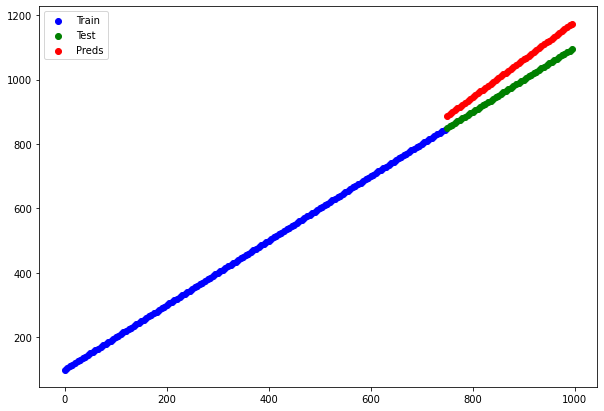

In [37]:
# Make preds with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the models predictions
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b',label='Train')
plt.scatter(X_reg_test,y_reg_test,c='g',label='Test')
plt.scatter(X_reg_test,y_reg_preds,c='r',label='Preds')
plt.legend();

## The missing pieace: Non-linearity

In [38]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

# Compile
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())

# Fit
history = model_4.fit(X,y,epochs=100,verbose=0)

doing binary classifcation...


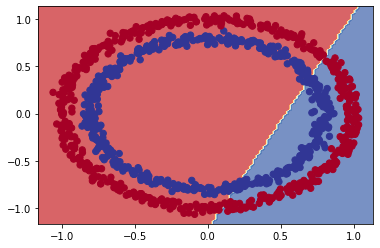

In [39]:
plot_decision_boundary(model_4,X,y)

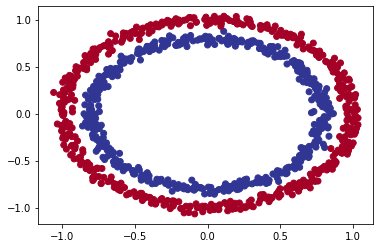

In [40]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [41]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7853 - accuracy: 0.4770


[0.7852917909622192, 0.47699999809265137]

In [42]:
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7288 - accuracy: 0.4193
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2373 - accuracy: 0.3990
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4747 - accuracy: 0.4122
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7522 - accuracy: 0.4281
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0655 - accuracy: 0.4123
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5869 - accuracy: 0.4385
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7552 - accuracy: 0.4281
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5621 - accuracy: 0.4422
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7584 - accuracy: 0.4194
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3939 - accuracy: 0.4631
Epoch 11/

doing binary classifcation...


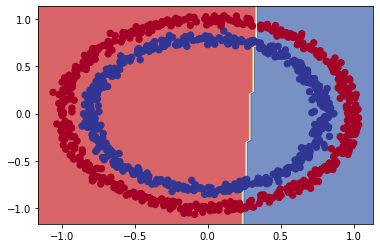

In [43]:
plot_decision_boundary(model_5,X,y)

In [44]:
model_5.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6999 - accuracy: 0.4860


[0.6998737454414368, 0.4860000014305115]

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000
[0.6931548714637756, 0.5]
doing binary classifcation...


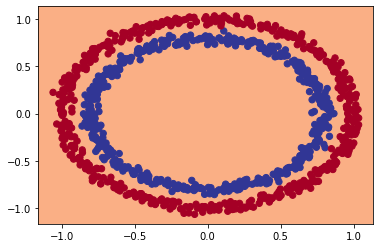

In [45]:
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation=tf.keras.activations.softmax)
])
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_6.fit(X,y,epochs=100,verbose=0)
print(model_6.evaluate(X,y))
plot_decision_boundary(model_6,X,y)

32/32 [==============================] - 0s 1ms/step - loss: 3.5211 - accuracy: 0.4800
[3.52113938331604, 0.47999998927116394]
doing binary classifcation...


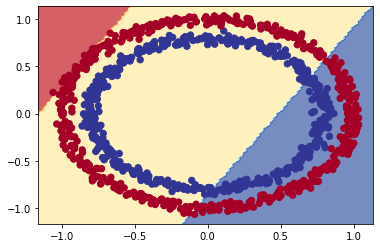

In [46]:
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation=tf.keras.activations.tanh)
])
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_7.fit(X,y,epochs=100,verbose=0)
print(model_7.evaluate(X,y))
plot_decision_boundary(model_7,X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.9705 - accuracy: 0.9580
[0.9705062508583069, 0.9580000042915344]
doing multiclass classification...


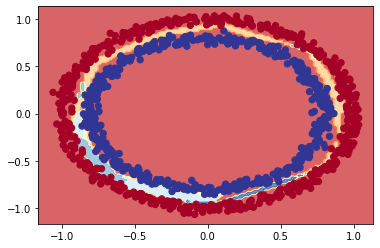

In [47]:
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(8,activation=tf.keras.activations.relu)
])
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam(lr=0.001))
model_8.fit(X,y,epochs=100,verbose=0)
print(model_8.evaluate(X,y))
plot_decision_boundary(model_8,X,y)

In [48]:
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(1)
])
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])
history = model_9.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 2ms/step - loss: 5.2347 - accuracy: 0.4830
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 4.4036 - accuracy: 0.4880
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 3.6136 - accuracy: 0.4931
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 4.0272 - accuracy: 0.4964
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 3.7076 - accuracy: 0.4827
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 3.2307 - accuracy: 0.5318
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 3.2138 - accuracy: 0.5058
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 3.0721 - accuracy: 0.4998
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 2.9225 - accuracy: 0.4796
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 2.5803 - accuracy: 0.5161
Epoch 11/

In [49]:
model_9.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1202 - accuracy: 0.9680


[0.12021583318710327, 0.9679999947547913]

doing binary classifcation...


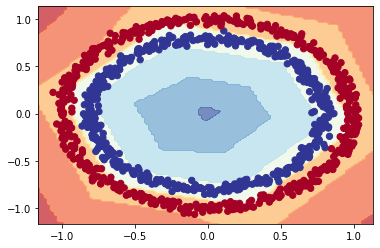

In [50]:
plot_decision_boundary(model_9,X,y)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.4876
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.4938
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5038
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5373
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.6263
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.6772
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6105 - accuracy: 0.8362
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.9199
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.9582
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.9787
Epoch 11/

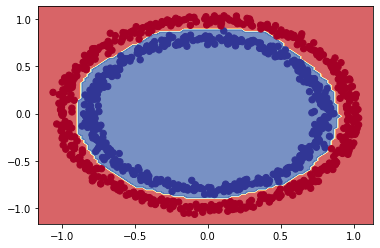

In [51]:
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam(lr=0.001))
model_8.fit(X,y,epochs=100)
print(model_8.evaluate(X,y))
plot_decision_boundary(model_8,X,y)

In [52]:
model_8.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 2.1021e-04 - accuracy: 1.0000


[0.00021021414431743324, 1.0]

In [53]:
tf.random.set_seed(42)
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])
history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4875
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5470
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5004
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5259
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5237
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5427
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5396
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5360
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5418
Epoch 11/

doing binary classifcation...


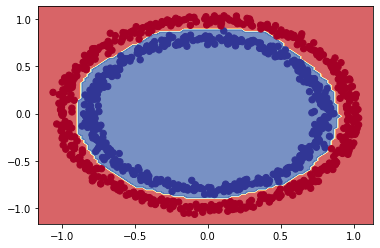

In [54]:
plot_decision_boundary(model_8,X,y)

In [55]:
print(model_8.evaluate(X,y))

32/32 [==============================] - 0s 2ms/step - loss: 2.1021e-04 - accuracy: 1.0000
[0.00021021414431743324, 1.0]


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [57]:
# the combotniton of linear (straight lines) and non-linear (non-straigt lines) funtions is one of the key things of NN

In [58]:
# Crete a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10),tf.float32)

In [59]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

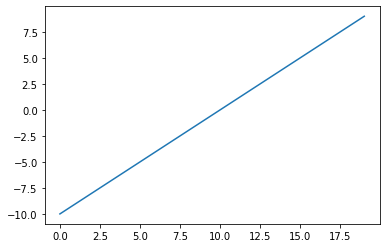

In [60]:
# Visualize our toy tensor
plt.plot(A);

In [61]:
# Lets start by replicating sigmoid
def sigmoid(x):
  return 1 / (1 + tf.math.exp(x))

In [62]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([9.9995458e-01, 9.9987662e-01, 9.9966466e-01, 9.9908900e-01,
       9.9752742e-01, 9.9330717e-01, 9.8201376e-01, 9.5257413e-01,
       8.8079703e-01, 7.3105854e-01, 5.0000000e-01, 2.6894143e-01,
       1.1920292e-01, 4.7425874e-02, 1.7986210e-02, 6.6928510e-03,
       2.4726230e-03, 9.1105117e-04, 3.3535014e-04, 1.2339458e-04],
      dtype=float32)>

In [63]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

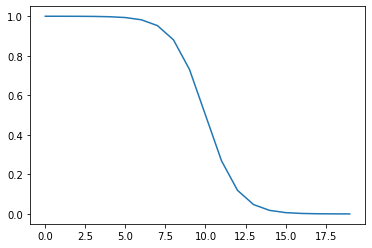

In [64]:
# Plot our toy tensor transormed by sgmoid
plt.plot(sigmoid(A));

In [65]:
def relu(x):
  return tf.maximum(0,x)

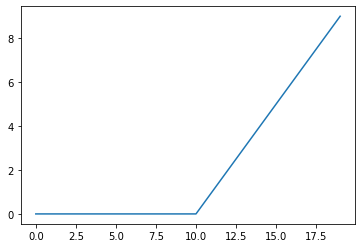

In [66]:
plt.plot(relu(A))

In [67]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

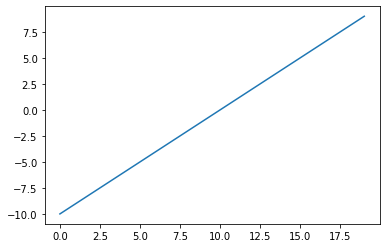

In [68]:
plt.plot(tf.keras.activations.linear(A))

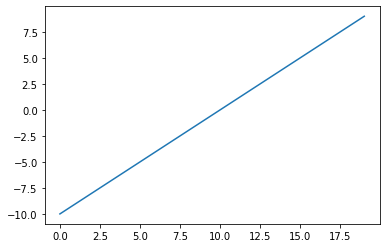

In [69]:
plt.plot(A)

In [70]:
# ELU leakyrelu tabular

## Evaluating and improving our classification model

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [72]:
# X_test,X_valid,y_test,y_valid = train_test_split(X_test,y_test,test_size=0.50)

In [73]:
len(X_train),len(X_test)# ,len(X_valid)

(750, 250)

In [74]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((750, 2), (750,), (250, 2), (250,))

In [75]:
# Lets recreate a model to fit on the training data and evlauate on the testing
tf.random.set_seed(42)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam(lr=0.01))
history = model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
24/24 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.5168
Epoch 2/25
24/24 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6404
Epoch 3/25
24/24 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.5698
Epoch 4/25
24/24 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.6215
Epoch 5/25
24/24 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.5795
Epoch 6/25
24/24 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.6076
Epoch 7/25
24/24 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6194
Epoch 8/25
24/24 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.6579
Epoch 9/25
24/24 [==============================] - 0s 2ms/step - loss: 0.6244 - accuracy: 0.6035
Epoch 10/25
24/24 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.6880
Epoch 11/25
24/24 [

In [76]:
model_8.evaluate(X_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.9840


[0.11572021245956421, 0.984000027179718]

doing binary classifcation...
doing binary classifcation...


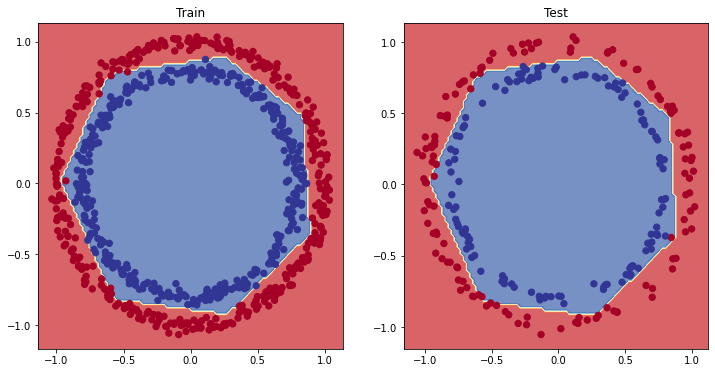

In [77]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_8,X_test,y_test)
plt.show();

## Plot the loss curves 

In [78]:
history.history

{'accuracy': [0.5293333530426025,
  0.6106666922569275,
  0.5759999752044678,
  0.6079999804496765,
  0.5879999995231628,
  0.5946666598320007,
  0.6000000238418579,
  0.6453333497047424,
  0.6546666622161865,
  0.6866666674613953,
  0.7480000257492065,
  0.7866666913032532,
  0.8573333621025085,
  0.909333348274231,
  0.9506666660308838,
  0.9746666550636292,
  0.9693333506584167,
  0.9786666631698608,
  0.9879999756813049,
  0.9853333234786987,
  0.9786666631698608,
  0.9919999837875366,
  0.9933333396911621,
  0.9933333396911621,
  0.9946666955947876],
 'loss': [0.6813828945159912,
  0.6741377115249634,
  0.6654143929481506,
  0.6580847501754761,
  0.6521947979927063,
  0.6450456380844116,
  0.637453556060791,
  0.6257836818695068,
  0.6068364977836609,
  0.586260199546814,
  0.5577443242073059,
  0.5127847194671631,
  0.4474795460700989,
  0.39208969473838806,
  0.33020368218421936,
  0.278071790933609,
  0.24540342390537262,
  0.21019873023033142,
  0.17887456715106964,
  0.155052

In [79]:
# Convert the history object into DF
pd.DataFrame(history.history)

,loss,accuracy
0,0.681383,0.529333
1,0.674138,0.610667
2,0.665414,0.576000
3,0.658085,0.608000
4,0.652195,0.588000
5,0.645046,0.594667
6,0.637454,0.600000
7,0.625784,0.645333
8,0.606836,0.654667
9,0.586260,0.686667


Text(0.5, 1.0, 'Model_8 Loss Curves')

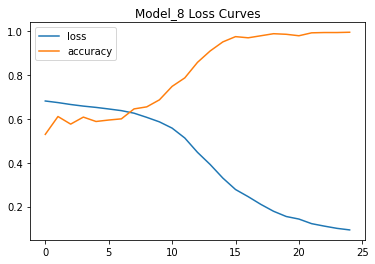

In [80]:
pd.DataFrame(history.history).plot()
plt.title('Model_8 Loss Curves')

In [81]:
# Note for many problem the loss funtion going down is telling that the model is imrpoving

## Finding the best lr

To find the idea lr (the lr rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your *while training*.
* Another model
* A modified loss curve plot

In [82]:
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history = model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_schedular])

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5084
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4795
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4872
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4714
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.4967
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5112
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5287
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.4960
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5094
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.4993
Epoch 11/

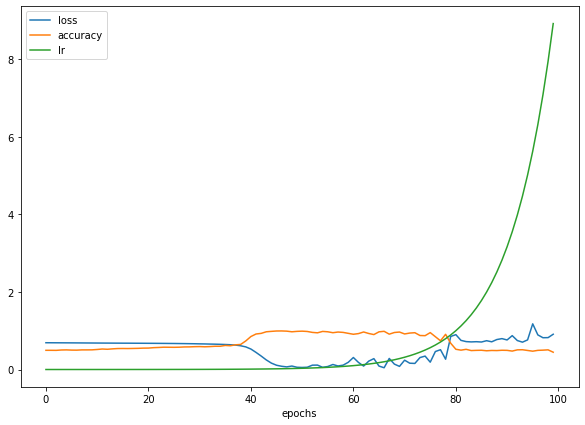

In [83]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel='epochs')

Text(0.5, 1.0, 'lr vs loss')

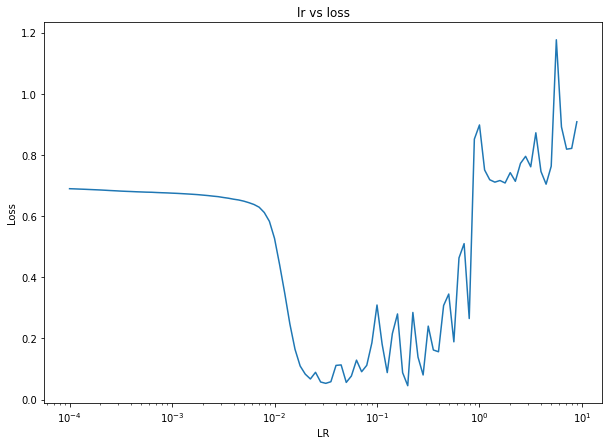

In [84]:
# Plot the lr VS loss
lrs = 0.0001 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel('LR')
plt.ylabel('Loss')
plt.title('lr vs loss')

In [85]:
0.01
0.1

0.1

# lr's to use

- 1
- 0.1
- 0.01
- 0.001
- 0.0001
- 0.00001

In [86]:
model_8.evaluate(X_test,y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.1157 - accuracy: 0.9840


[0.11572021245956421, 0.984000027179718]

In [87]:
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam(lr=0.02))
history = model_9.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=25)

Epoch 1/25
24/24 [==============================] - 1s 18ms/step - loss: 0.6969 - accuracy: 0.4996 - val_loss: 0.6879 - val_accuracy: 0.5240
Epoch 2/25
24/24 [==============================] - 0s 4ms/step - loss: 0.6747 - accuracy: 0.5813 - val_loss: 0.6794 - val_accuracy: 0.4960
Epoch 3/25
24/24 [==============================] - 0s 4ms/step - loss: 0.6594 - accuracy: 0.6128 - val_loss: 0.6583 - val_accuracy: 0.5760
Epoch 4/25
24/24 [==============================] - 0s 4ms/step - loss: 0.6184 - accuracy: 0.6954 - val_loss: 0.6070 - val_accuracy: 0.6920
Epoch 5/25
24/24 [==============================] - 0s 4ms/step - loss: 0.5516 - accuracy: 0.7920 - val_loss: 0.5037 - val_accuracy: 0.8320
Epoch 6/25
24/24 [==============================] - 0s 4ms/step - loss: 0.4484 - accuracy: 0.8529 - val_loss: 0.4305 - val_accuracy: 0.8520
Epoch 7/25
24/24 [==============================] - 0s 4ms/step - loss: 0.3479 - accuracy: 0.9306 - val_loss: 0.3025 - val_accuracy: 0.9360
Epoch 8/25
24/24 [=

In [88]:
model_9.evaluate(X_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9920


[0.03217271715402603, 0.9919999837875366]

In [89]:
model_9.evaluate(X_train,y_train)

24/24 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9973


[0.021935157477855682, 0.9973333477973938]

In [90]:
model_8.evaluate(X_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.9840


[0.11572021245956421, 0.984000027179718]

In [91]:
model_8.evaluate(X_train,y_train)

24/24 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.9947


[0.08548597246408463, 0.9946666955947876]

doing binary classifcation...


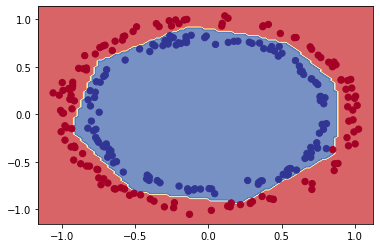

In [92]:
plot_decision_boundary(model_9,X_test,y_test)

doing binary classifcation...


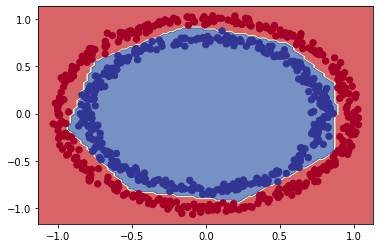

In [93]:
plot_decision_boundary(model_9,X_train,y_train)

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
# Precision (Highher)
# Accuracy (Higher)
# Confusion Matrix
# F1 Score (Lower)
# Recall ()
# Classification report (sklearn)

In [96]:
model_9

In [97]:
# Accuracy
loss,accuracy = model_8.evaluate(X_test,y_test)
print(f'Model (9) Loss (test data) : {loss}')
print(f'Model (9) Accuracy (test data) : {accuracy*100}%')

8/8 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.9840
Model (9) Loss (test data) : 0.11572021245956421
Model (9) Accuracy (test data) : 98.4000027179718%


### Confusion matrix

In [98]:
y_pred = model_8.predict(X_test)
from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test,y_pred)

In [99]:
y_test[:1]

array([0])

In [100]:
y_pred[:1]

array([[0.17738745]], dtype=float32)

In [101]:
# Opps.. Looks like our preds array has come out in prediction probaability form.. the standard output from sigmoid(or softmax) activation funtion

In [102]:
y_pred = np.round(y_pred)

In [103]:
pd.DataFrame(y_pred).value_counts()

0.0    126
1.0    124
dtype: int64

In [104]:
y_pred  = tf.squeeze(y_pred)

In [105]:
confusion_matrix(y_test,y_pred)

array([[125,   3],
       [  1, 121]])

In [106]:
import seaborn as sns

In [107]:
confusion_matrix(y_test,y_pred)

array([[125,   3],
       [  1, 121]])

How about we preetyy our confusion matrix

In [108]:
# Note : the confusion matrix code we're going to write is a remix of sklearn `plot_confusion_matrix()`

In [109]:
import itertools

In [110]:
import seaborn as sns

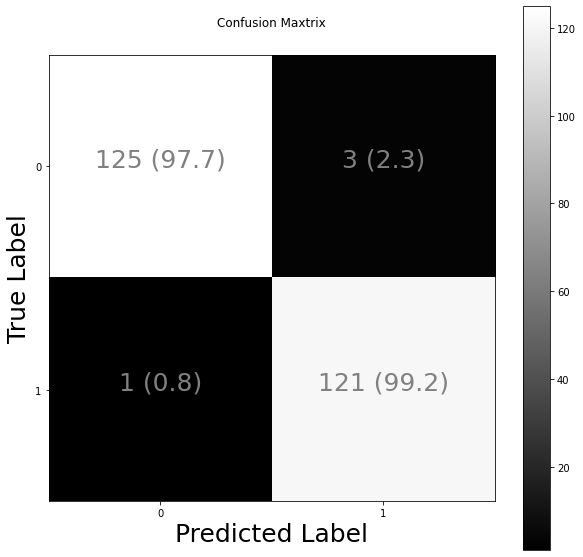

In [111]:
figsize = (10,10)

# Create confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis] # normaliize our confusion matrix
n_classess = cm.shape[0]
# Lets prettify it
fig,ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.gray)
fig.colorbar(cax)
# Create classes
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])
# Label the axis
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()
ax.yaxis.label.set_size(25)
ax.xaxis.label.set_size(25)
ax.set(title='Confusion Maxtrix',xlabel='Predicted Label',ylabel='True Label',xticks=np.arange(n_classess),yticks=np.arange(n_classess),xticklabels=labels,yticklabels=labels)
threshold = (cm.max() + cm.min()) / 2.
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f'{cm[i,j]} ({cm_norm[i,j]*100:.1f})',horizontalalignment='center',color='gray',size=25)

In [112]:
cm_norm

array([[0.9765625 , 0.0234375 ],
       [0.00819672, 0.99180328]])

In [113]:
cm

array([[125,   3],
       [  1, 121]])

# Larger Problem (Classification (Multi))

When you have more than  classes as a option, its know as multi class classification

This means if you have 3 idfferebt classes, its mutli-class classification or even 100

To practise multi-class classification, we're going to build a NN to classify images of different items of cloathing

In [114]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# the data is already sorted into training and test sets for us
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [115]:
# Show the first training example
print(train_data[0])
print('-'*50)
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [116]:
# Check the shape of a single example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

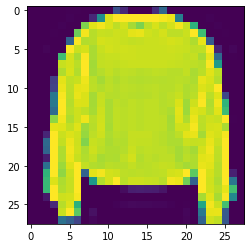

In [117]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [118]:
# Check out samples label
train_labels[7]

2

In [119]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ['T-Shirt','Trouser','PullOver','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [120]:
len(class_names)

10

Text(0.5, 1.0, 'T-Shirt')

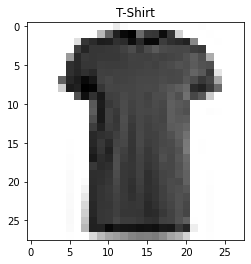

In [121]:
# Plot an example iage and its label
index = 17
plt.imshow(train_data[index],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

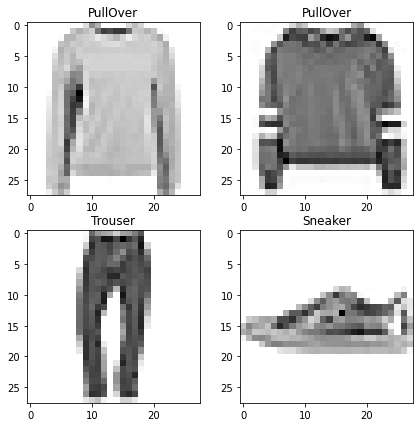

In [122]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

## Building a multi-class classification model

For our multi-class classifcation model, we can use a similar architecture we will need to change some stuff.

* Input Shape - 28  X 28 (Shape of 1 IMG)
* Output Shape - 10 (one per class of clothing)
* Loss Funtion - tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one hot encoded use CategoricalCrossentropy
  * Else use SparseCategoricalCrossentropy
* Output Activation - Softmax (Not Sigmoid)

In [123]:
# our data needs to be flattended (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [124]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [125]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential(
  [
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
  ]
)
# CategoricalCrossentropy expects a OneHotEncoded Model but what we should use here is SparseCategoricalCrossentropy
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels,depth=10),
                                epochs=10,
                                validation_data=(test_data,
                                                 tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8253 - accuracy: 0.1335 - val_loss: 1.8441 - val_accuracy: 0.2002
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7476 - accuracy: 0.2233 - val_loss: 1.6584 - val_accuracy: 0.2996
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6460 - accuracy: 0.2839 - val_loss: 1.6071 - val_accuracy: 0.2782
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6080 - accuracy: 0.2848 - val_loss: 1.6093 - val_accuracy: 0.2887
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6029 - accuracy: 0.2924 - val_loss: 1.5802 - val_accuracy: 0.3144
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5842 - accuracy: 0.3108 - val_loss: 1.5706 - val_accuracy: 0.3310
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5782 - accuracy: 0.3222 - val_loss: 1.5578 - val_accuracy:

In [126]:
tf.one_hot(test_labels,depth=10)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [127]:
tf.one_hot(test_labels,depth=10) # 10 becuase the amount of classes in my multi classifcation data

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [128]:
# Check the model summary
model_11.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_43 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [129]:
# Check the min and max vals of training data
train_data.min(),train_data.max()

(0, 255)

In [131]:
model_11.layers

In [132]:
model_11.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_43 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
